In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, r2_score
# Step 1: Load Dataset (update path if needed)
df = pd.read_csv("C:\\Users\\hafsa\\OneDrive\\Desktop\\FlightDelayData1.csv")  # Load the dataset
print(df)
print("Initial Data Shape:", df.shape)  # Print initial dimensions of the data

         Year  Month  DayofMonth  DayOfWeek Carrier  OriginAirportID  \
0        2013      4          19          5      DL            11433   
1        2013      4          19          5      DL            14869   
2        2013      4          19          5      DL            14057   
3        2013      4          19          5      DL            15016   
4        2013      4          19          5      DL            11193   
...       ...    ...         ...        ...     ...              ...   
1048570  2013      6          20          4      WN            13204   
1048571  2013      6          20          4      WN            13232   
1048572  2013      6          20          4      WN            13232   
1048573  2013      6          20          4      WN            13232   
1048574  2013      6          20          4      WN            13232   

         DestAirportID  CRSDepTime  DepDelay  DepDel15  CRSArrTime  ArrDelay  \
0                13303         837      -3.0       0.0 

In [7]:
# Step 2: Data Preprocessing
# Fill missing numerical values with column means
df.fillna(df.mean(numeric_only=True), inplace=True)
print("\nMissing values handled. Any remaining nulls?", df.isnull().sum().sum())
print("\nData after handling missing values:")
print(df.head())


Missing values handled. Any remaining nulls? 0

Data after handling missing values:
   Year  Month  DayofMonth  DayOfWeek Carrier  OriginAirportID  DestAirportID  \
0  2013      4          19          5      DL            11433          13303   
1  2013      4          19          5      DL            14869          12478   
2  2013      4          19          5      DL            14057          14869   
3  2013      4          19          5      DL            15016          11433   
4  2013      4          19          5      DL            11193          12892   

   CRSDepTime  DepDelay  DepDel15  CRSArrTime  ArrDelay  ArrDel15  Cancelled  
0         837      -3.0       0.0        1138       1.0         0          0  
1        1705       0.0       0.0        2336      -8.0         0          0  
2         600      -4.0       0.0         851     -15.0         0          0  
3        1630      28.0       1.0        1903      24.0         1          0  
4        1615      -6.0       0.0

In [9]:
# Encode categorical columns using Label Encoding
le = LabelEncoder()
df['Carrier'] = le.fit_transform(df['Carrier'].astype(str))  # Encode airline carrier names
df['OriginAirportID'] = le.fit_transform(df['OriginAirportID'].astype(str))
df['DestAirportID'] = le.fit_transform(df['DestAirportID'].astype(str))
print("\nCategorical encoding complete. Unique Carriers:", df['Carrier'].nunique())
print("\nData after encoding categorical variables:")
print(df.head())


Categorical encoding complete. Unique Carriers: 16

Data after encoding categorical variables:
   Year  Month  DayofMonth  DayOfWeek  Carrier  OriginAirportID  \
0  2013      4          19          5        4               18   
1  2013      4          19          5        4               64   
2  2013      4          19          5        4               48   
3  2013      4          19          5        4               67   
4  2013      4          19          5        4               13   

   DestAirportID  CRSDepTime  DepDelay  DepDel15  CRSArrTime  ArrDelay  \
0             36         837      -3.0       0.0        1138       1.0   
1             27        1705       0.0       0.0        2336      -8.0   
2             64         600      -4.0       0.0         851     -15.0   
3             18        1630      28.0       1.0        1903      24.0   
4             29        1615      -6.0       0.0        1805     -11.0   

   ArrDel15  Cancelled  
0         0          0  
1     

In [11]:
# Step 3: Central Tendency (using DepDelay as example)
print("\nCentral Tendency Measures for 'DepDelay':")
print("Mean:", df['DepDelay'].mean())
print("Median:", df['DepDelay'].median())
print("Mode:", df['DepDelay'].mode()[0])


Central Tendency Measures for 'DepDelay':
Mean: 11.504283746078052
Median: -1.0
Mode: -3.0


In [13]:
# Step 4: Dispersion Measures
print("\nDispersion Measures for 'DepDelay':")
print("Variance:", df['DepDelay'].var())
print("Standard Deviation:", df['DepDelay'].std())
print("Range:", df['DepDelay'].max() - df['DepDelay'].min())


Dispersion Measures for 'DepDelay':
Variance: 1446.8867127993149
Standard Deviation: 38.03796409903289
Range: 1538.0


In [15]:
# Step 5: Normalization using MinMaxScaler
scaler = MinMaxScaler()
df[['CRSDepTime', 'DepDelay', 'CRSArrTime', 'ArrDelay']] = scaler.fit_transform(
    df[['CRSDepTime', 'DepDelay', 'CRSArrTime', 'ArrDelay']])
print("\nNormalization complete. Sample normalized values:")
print(df[['CRSDepTime', 'DepDelay', 'CRSArrTime', 'ArrDelay']].head())


Normalization complete. Sample normalized values:
   CRSDepTime  DepDelay  CRSArrTime  ArrDelay
0    0.353441  0.037061    0.482188  0.060897
1    0.722175  0.039012    0.990246  0.055128
2    0.252761  0.036411    0.360475  0.050641
3    0.690314  0.057217    0.806616  0.075641
4    0.683942  0.035111    0.765055  0.053205


In [17]:
# Step 6: Covariance
print("\nCovariance between 'DepDelay' and 'ArrDelay':")
print(df[['DepDelay', 'ArrDelay']].cov())

# Step 7: Correlation
print("\nCorrelation Matrix:")
print(df[['DepDelay', 'ArrDelay']].corr())


Covariance between 'DepDelay' and 'ArrDelay':
          DepDelay  ArrDelay
DepDelay  0.000612  0.000609
ArrDelay  0.000609  0.000684

Correlation Matrix:
          DepDelay  ArrDelay
DepDelay   1.00000   0.94117
ArrDelay   0.94117   1.00000


In [19]:
# Step 8: EDA
print("\nDescriptive Statistics:")
print(df.describe())
print("\nCarrier Frequency:")
print(df['Carrier'].value_counts())


Descriptive Statistics:
            Year         Month    DayofMonth     DayOfWeek       Carrier  \
count  1048575.0  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06   
mean      2013.0  4.894107e+00  1.522681e+01  3.902232e+00  8.110018e+00   
std          0.0  7.843287e-01  8.718746e+00  1.986769e+00  4.905675e+00   
min       2013.0  4.000000e+00  1.000000e+00  1.000000e+00  0.000000e+00   
25%       2013.0  4.000000e+00  8.000000e+00  2.000000e+00  4.000000e+00   
50%       2013.0  5.000000e+00  1.500000e+01  4.000000e+00  1.000000e+01   
75%       2013.0  6.000000e+00  2.300000e+01  6.000000e+00  1.200000e+01   
max       2013.0  6.000000e+00  3.100000e+01  7.000000e+00  1.500000e+01   

       OriginAirportID  DestAirportID    CRSDepTime      DepDelay  \
count     1.048575e+06   1.048575e+06  1.048575e+06  1.048575e+06   
mean      3.185260e+01   3.188181e+01  5.626027e-01  4.649173e-02   
std       1.938329e+01   1.938895e+01  2.023750e-01  2.473210e-02   
min       0.00


Generating Visualizations...


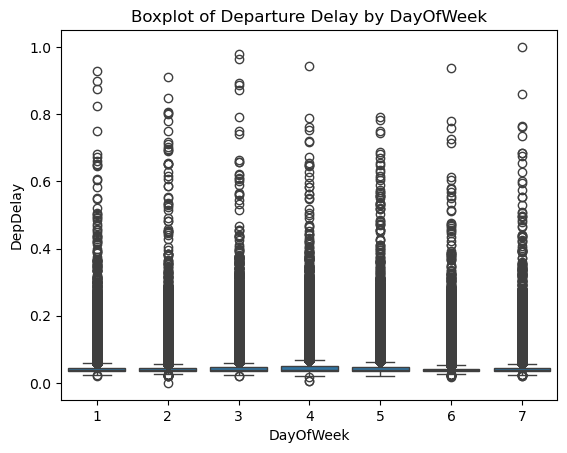

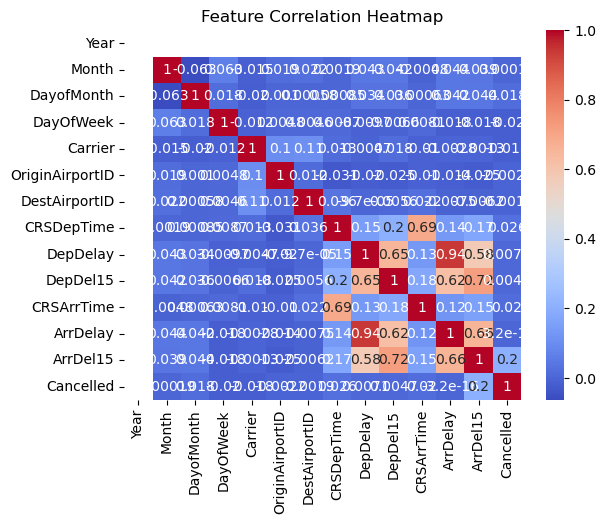

In [21]:
# Step 9: Visualization
print("\nGenerating Visualizations...")
sns.boxplot(x='DayOfWeek', y='DepDelay', data=df)
plt.title("Boxplot of Departure Delay by DayOfWeek")
plt.show()

sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [23]:
# Step 10: Sampling
sample_df = df.sample(frac=0.7, random_state=42)  # Take 70% random sample
print("\nRandom Sample of Data:")
print(sample_df.head())


Random Sample of Data:
        Year  Month  DayofMonth  DayOfWeek  Carrier  OriginAirportID  \
781974  2013      6          13          4        9               36   
937737  2013      6          19          3        3                6   
907828  2013      6          27          4        1               27   
784628  2013      6           7          5        9               45   
662460  2013      5          28          2       14               65   

        DestAirportID  CRSDepTime  DepDelay  DepDel15  CRSArrTime  ArrDelay  \
781974             11    0.696686  0.037061       0.0    0.786260  0.126923   
937737             49    0.269754  0.033810       0.0    0.342239  0.062179   
907828              6    0.350467  0.040312       0.0    0.402460  0.049359   
784628             64    0.569244  0.037711       0.0    0.678117  0.058333   
662460              8    0.401444  0.039012       0.0    0.466073  0.053846   

        ArrDel15  Cancelled  
781974         1          0  
937737  

In [25]:
# Step 11: Train-Test Split (Classification)
X = df[['CRSDepTime', 'Carrier', 'OriginAirportID', 'DestAirportID']]
y = df['DepDel15']

# Convert target to binary for classification
y_binary = (y > 0).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

print("\nTrain Test Split Done.")
print("Train Features:", X_train.shape)
print("Train Labels:", y_train.shape)


Train Test Split Done.
Train Features: (838860, 4)
Train Labels: (838860,)


In [29]:
# Step 13: Logistic Regression
# Classification of DepDel15 (departure delay > 0 or not)
log_model = LogisticRegression(max_iter=200)
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)
print("\n✅ Logistic Regression Sample Predictions:", log_pred[:5])


✅ Logistic Regression Sample Predictions: [0 0 0 0 0]


In [31]:
# Step 17: Linear Regression (Predicting Continuous Arrival Delay)
print("\n🎯 Now performing Linear Regression on continuous 'ArrDelay'...")

# Define features and target for regression
X_reg = df[['CRSDepTime', 'DepDelay', 'Carrier', 'OriginAirportID', 'DestAirportID']]
y_reg = df['ArrDelay']

# Split data
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Train Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(Xr_train, yr_train)

# Predict
yr_pred = lin_reg.predict(Xr_test)

# Show results
print("\n📊 Linear Regression Sample Predictions:", yr_pred[:5])
print("🔍 Mean Squared Error:", mean_squared_error(yr_test, yr_pred))
print("📈 R2 Score:", r2_score(yr_test, yr_pred))


🎯 Now performing Linear Regression on continuous 'ArrDelay'...

📊 Linear Regression Sample Predictions: [0.05603008 0.0523191  0.05932567 0.05625469 0.05838382]
🔍 Mean Squared Error: 7.729185374370986e-05
📈 R2 Score: 0.8870328929797509


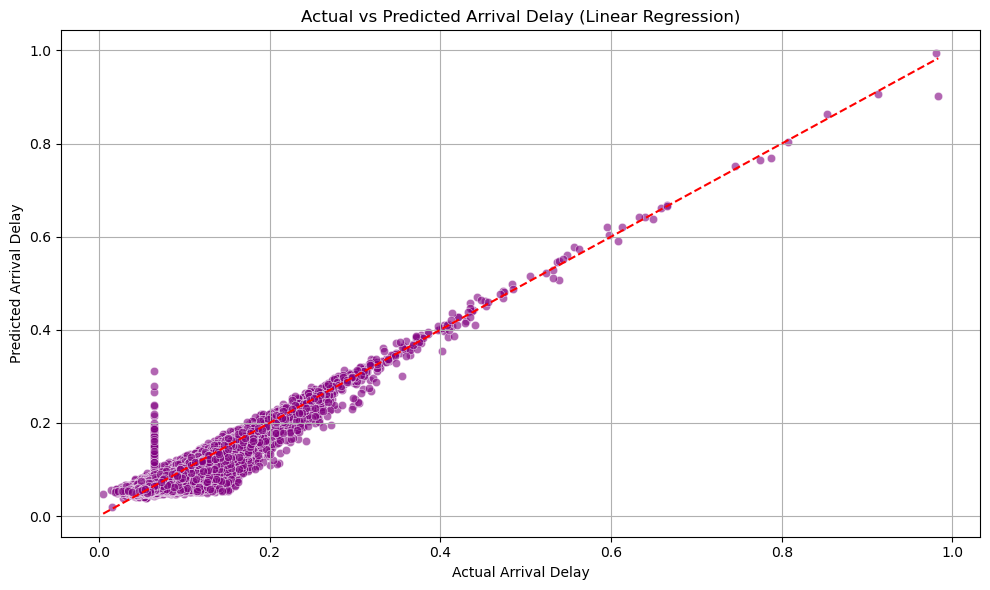

In [35]:
# Step 18: Visual Comparison - Actual vs Predicted Arrival Delay

import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of Actual vs Predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=yr_test, y=yr_pred, alpha=0.6, color='purple')
plt.plot([yr_test.min(), yr_test.max()], [yr_test.min(), yr_test.max()], 'r--')  # Perfect line
plt.xlabel("Actual Arrival Delay")
plt.ylabel("Predicted Arrival Delay")
plt.title("Actual vs Predicted Arrival Delay (Linear Regression)")
plt.grid(True)
plt.tight_layout()
plt.show()
